In [1]:
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 8s 1us/step


(60000, 28, 28)

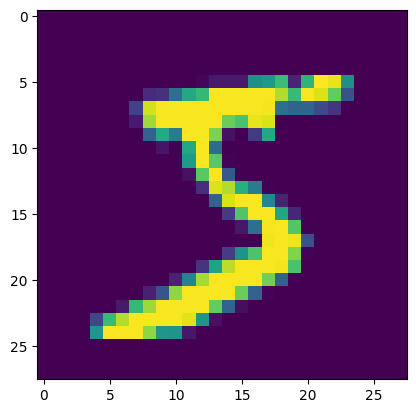

In [3]:
# Visulaize
plt.imshow(X_train[0])

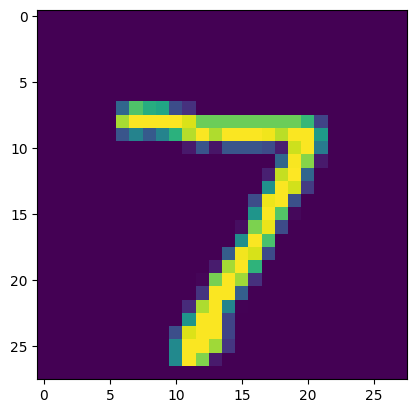

In [4]:
plt.imshow(X_test[0])


In [5]:
# convert into vector
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [6]:
# rescale
X_train.max()

255

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.max()

1.0

# Model

In [8]:
input_layer = Input(shape = (X_train.shape[1]))
bottleneck = Dense(32, activation = 'relu', name = 'bottleneck')(input_layer)
output = Dense(X_train.shape[1], activation = 'sigmoid', name = 'output')(bottleneck)

In [9]:
autoencoder = Model(input_layer, output)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
encoder = Model(input_layer, bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [11]:
encoded_layer = Input(shape = (32,), name = 'encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_layer (InputLayer)  [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(loss = 'mse', optimizer = 'adam')
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size = 128)

Epoch 1/20
469/469 [==============================] - 36s 15ms/step - loss: 0.0541
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0258
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0186
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0150
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0128
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0116
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0110
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0107
Epoch 9/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0105
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0104
Epoch 11/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0104
Epoch 12/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0103
Epoch 13/20


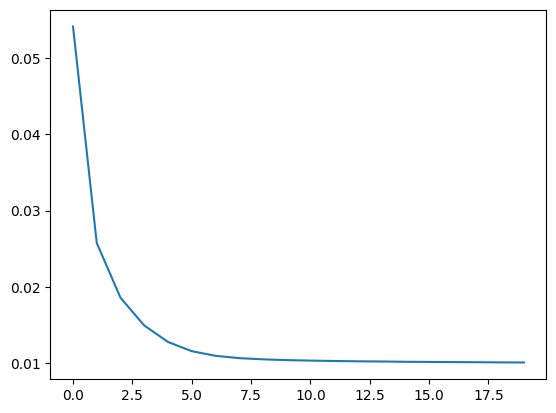

In [13]:
plt.plot(history.history['loss'])


In [14]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape

20/20 [==============================] - 2s 12ms/step


(10000, 32)

In [15]:
output_data = decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 [==============================] - 1s 10ms/step


(10000, 784)

In [16]:
output_data = output_data.reshape(output_data.shape[0], 28,28)
output_data.shape

(10000, 28, 28)

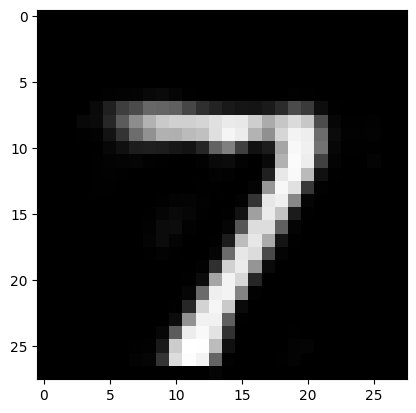

In [17]:
plt.imshow(output_data[0], cmap ='gray')


In [18]:
X_test = X_test.reshape(10000, 28,28)
X_test.shape

(10000, 28, 28)

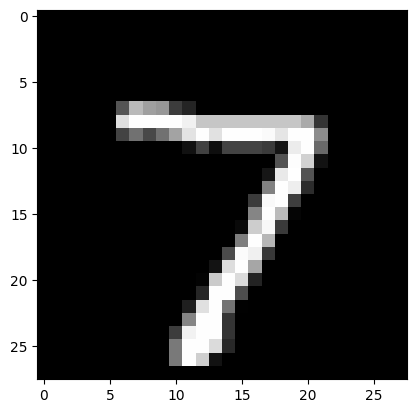

In [19]:
plt.imshow(X_test[0], cmap = 'gray')
